In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from tabulate import tabulate
import seaborn as sns
import numpy as np

In [3]:
# MySQL 연결 함수
def get_connection():
    conn = pymysql.connect(
        host="localhost",
        user="emily0",
        password="1234",
        db="leisure",
        charset="utf8"
    )
    return conn

# MySQL에서 데이터를 가져와 DataFrame으로 변환하는 함수
def fetch_data(query):
    conn = get_connection()
    cur = conn.cursor(pymysql.cursors.DictCursor)
    cur.execute(query)
    rows = cur.fetchall()
    df = pd.DataFrame(rows)
    cur.close()
    conn.close()
    return df


In [5]:
# 1. 2013년부터 각 경제지표(4가지) 변화
# 1-1. 고용률
def get_employment_rate():
    query = """
    SELECT year, 전국, 서울특별시, 부산광역시, 대구광역시, 
                  인천광역시, 광주광역시, 대전광역시, 울산광역시
    FROM employment_data
    WHERE year >= 2013
    ORDER BY year
    """
    return fetch_data(query)

df_employment_rate = get_employment_rate()
df_employment_rate

,year,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
0,2013,59.8,59.9,56.1,57.9,61.3,57.2,57.5,59.0
1,2014,60.5,60.5,56.7,58.7,61.3,58.8,59.1,58.3
2,2015,60.5,60.0,56.3,59.4,61.1,58.5,59.6,59.0
3,2016,60.6,60.0,56.2,59.3,61.8,58.1,59.7,59.0
4,2017,60.8,60.2,56.3,58.8,61.7,59.0,58.9,59.8
5,2018,60.7,59.6,55.7,58.2,62.9,59.4,58.7,59.0
6,2019,60.9,60.0,56.6,57.9,62.5,59.3,59.8,59.1
7,2020,60.1,59.3,55.6,56.6,61.3,58.7,60.7,58.1
8,2021,60.5,59.2,56.2,58.2,61.3,58.2,60.9,57.7
9,2022,62.1,60.4,57.1,59.1,62.7,58.6,61.6,59.2


In [6]:
# 1-2. 실업률
def get_unemployment_rate():
    query = """
    SELECT year, 전국, 서울특별시, 부산광역시, 대구광역시, 
                  인천광역시, 광주광역시, 대전광역시, 울산광역시
    FROM unemployment_data
    WHERE year >= 2013
    ORDER BY year
    """
    return fetch_data(query)

df_unemployment_rate = get_unemployment_rate()
df_unemployment_rate

,year,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
0,2013,3.1,3.9,3.8,3.3,4.1,2.8,3.0,2.1
1,2014,3.5,4.4,3.8,3.8,4.7,2.8,3.4,2.7
2,2015,3.6,4.2,4.1,3.5,5.0,2.9,3.4,2.9
3,2016,3.7,4.2,3.9,4.1,4.9,3.1,3.2,3.8
4,2017,3.7,4.5,4.6,4.0,4.6,2.9,3.4,3.5
5,2018,3.8,4.8,4.1,4.4,4.3,3.8,4.2,4.6
6,2019,3.8,4.4,3.7,3.7,4.4,3.7,4.2,4.2
7,2020,4.0,4.6,4.2,3.9,4.6,3.9,4.4,4.2
8,2021,3.7,4.8,3.4,3.7,4.0,3.6,3.3,3.6
9,2022,2.9,3.4,3.0,2.9,3.3,2.9,2.4,3.2


In [10]:
# 1-3. 경제활동인구비율
def get_active_population():
    query = """
    SELECT year, 전국, 서울특별시, 부산광역시, 대구광역시, 
                  인천광역시, 광주광역시, 대전광역시, 울산광역시
    FROM active_economy_data
    WHERE year >= 2013
    ORDER BY year
    """
    return fetch_data(query)

df_active_population = get_active_population()
df_active_population

,year,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
0,2013,61.7,62.3,58.4,59.9,63.9,58.9,59.3,60.3
1,2014,62.7,63.3,59.0,61.0,64.3,60.5,61.2,59.9
2,2015,62.8,62.6,58.7,61.6,64.4,60.3,61.7,60.8
3,2016,62.9,62.6,58.5,61.9,64.9,59.9,61.7,61.3
4,2017,63.2,63.1,59.0,61.2,64.7,60.8,61.0,61.9
5,2018,63.1,62.6,58.1,60.9,65.7,61.7,61.3,61.8
6,2019,63.3,62.7,58.8,60.2,65.4,61.5,62.4,61.7
7,2020,62.5,62.1,58.1,58.9,64.2,61.0,63.4,60.7
8,2021,62.8,62.3,58.2,60.5,63.9,60.3,63.0,59.8
9,2022,63.9,62.5,58.9,60.9,64.8,60.4,63.1,61.1


In [12]:
# 1-4. 비경제활동인구수
def get_inactive_population():
    query = """
    SELECT year, 전국, 서울특별시, 부산광역시, 대구광역시, 
                  인천광역시, 광주광역시, 대전광역시, 울산광역시
    FROM inactive_economy_data
    WHERE year >= 2013
    ORDER BY year
    """
    return fetch_data(query)

df_inactive_population = get_inactive_population()
df_inactive_population

,year,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
0,2013,16196,3236,1239,834,852,508,520,372
1,2014,15959,3163,1225,815,858,491,500,383
2,2015,16086,3220,1238,805,867,498,494,380
3,2016,16187,3211,1247,802,863,504,496,378
4,2017,16183,3161,1226,817,878,494,505,372
5,2018,16287,3186,1247,824,858,483,500,371
6,2019,16318,3159,1219,838,876,486,485,370
7,2020,16773,3223,1237,859,910,497,471,379
8,2021,16770,3221,1234,825,920,508,477,386
9,2022,16339,3171,1209,812,906,507,475,372


In [13]:
# 2-1. 온천이용객수
def get_hotspring_data():
    query = """
    SELECT year, 전국, 경상북도, 경상남도, 강원특별자치도, 충청남도, 부산광역시
    FROM hotspring_data
    WHERE year >= 2013
    ORDER BY year
    """
    return fetch_data(query)

df_hotspring = get_hotspring_data()
df_hotspring

,year,전국,경상북도,경상남도,강원특별자치도,충청남도,부산광역시
0,2013,60627,11161.0,7921,3554,12978,7292.0
1,2014,60042,10649.0,6880,3559,15376,7229.0
2,2015,63011,10593.0,7789,3011,14084,7007.0
3,2016,59538,10680.0,8390,3071,11716,6861.0
4,2017,61528,12850.0,8233,4298,9459,7579.0
5,2018,60930,11317.0,7586,3897,8829,7624.0
6,2019,63817,11686.2,9306,3761,7559,10453.4
7,2020,42190,7246.0,6109,2204,8359,6560.0
8,2021,34359,5785.0,5112,1764,5991,6039.0
9,2022,41207,7654.0,5265,2709,7077,7059.0


In [15]:
# 2-2. 놀이공원 이용객 수
def get_park_data():
    query = """
    SELECT year, 롯데월드, 이월드, 서울랜드, 에버랜드, 경주월드, 
           (롯데월드 + 이월드 + 서울랜드 + 에버랜드 + 경주월드) AS 전체_이용객수
    FROM park_fixed
    ORDER BY year
    """
    return fetch_data(query)

df_park = get_park_data()
df_park

,year,롯데월드,이월드,서울랜드,에버랜드,경주월드,전체_이용객수
0,2015,0,1466596,2027877,7422938,1089496,12006907
1,2016,0,1809974,2015099,6965311,954604,11744988
2,2017,0,1924722,1923458,6313055,1266637,11427872
3,2018,5692646,1961099,1225821,6145096,1216101,16240763
4,2019,5786118,1865271,1476488,6605814,1228621,16962312
5,2020,1557802,692773,648945,2754555,624392,6278467
6,2021,2462472,1318946,1064445,3705809,972512,9524184
7,2022,4516912,2341894,1383301,5773834,1529344,15545285
8,2023,5192688,3110460,1332898,5881640,1097075,16614761


In [17]:
def get_tour_data():
    query = """
    SELECT *
    FROM tour_fixed
    ORDER BY year
    """
    return fetch_data(query)

df_tour = get_tour_data()
df_tour

,year,관광지점_수,입장객_수
0,2014,1397,223389
1,2015,1519,221457
2,2016,1741,218377
3,2017,1967,213041
4,2018,2147,200765
5,2019,2414,196057
6,2020,2569,103469
7,2021,2634,112091
8,2022,2719,148489
9,2023,2752,161836


In [18]:
# 2-4. 전국 스키장이용객수
def get_ski_data():
    query = """
    SELECT *
    FROM ski_fixed
    ORDER BY year
    """
    return fetch_data(query)

df_ski = get_ski_data()
df_ski

,year,스키 이용객 수
0,2012,6860
1,2013,6310
2,2014,5580
3,2015,4970
4,2016,4920
5,2017,4860
6,2018,4350
7,2019,4390
8,2020,3760
9,2021,1450


In [29]:
# 3-1. 전국 스키장이용객수와 경제지표
def get_ski_economy_data():
    query = """
    SELECT s.year, s.스키_이용객_수, 
           e.inactive_population AS 비경제활동인구, e.national_unemployment_rate AS 실업률
    FROM ski_fixed s
    INNER JOIN economic_summary e ON s.year = e.year
    ORDER BY s.year
    """
    return fetch_data(query)

df_ski_economy = get_ski_economy_data()
df_ski_economy

,year,스키_이용객_수,비경제활동인구,실업률
0,2012,6860,16076,3.2
1,2013,6310,16196,3.1
2,2014,5580,15959,3.5
3,2015,4970,16086,3.6
4,2016,4920,16187,3.7
5,2017,4860,16183,3.7
6,2018,4350,16287,3.8
7,2019,4390,16318,3.8
8,2020,3760,16773,4.0
9,2021,1450,16770,3.7


In [21]:
# 3-2 전국 관광입장객수와 경제지표
def get_tour_economy_data():
    query = """
    SELECT t.year, t.입장객_수, 
           e.inactive_population AS 비경제활동인구, e.national_unemployment_rate AS 실업률
    FROM tour_fixed t
    INNER JOIN economic_summary e ON t.year = e.year
    ORDER BY t.year
    """
    return fetch_data(query)

df_tour_economy = get_tour_economy_data()
df_tour_economy

,year,입장객_수,비경제활동인구,실업률
0,2014,223389,15959,3.5
1,2015,221457,16086,3.6
2,2016,218377,16187,3.7
3,2017,213041,16183,3.7
4,2018,200765,16287,3.8
5,2019,196057,16318,3.8
6,2020,103469,16773,4.0
7,2021,112091,16770,3.7
8,2022,148489,16339,2.9
9,2023,161836,16204,2.7


In [22]:
# 3-3 놀이공원 총 이용객수와 경제지표
def get_park_economy_data():
    query = """
    SELECT p.year,p.전체_이용객수,
        e.inactive_population AS 비경제활동인구, e.national_unemployment_rate AS 실업률
    FROM (
        SELECT year,
               (롯데월드 + 이월드 + 서울랜드 + 에버랜드 + 경주월드) AS 전체_이용객수
        FROM park_fixed
    ) p
    INNER JOIN economic_summary e ON p.year = e.year
    ORDER BY p.year
    """
    return fetch_data(query)

df_park_economy = get_park_economy_data()
df_park_economy

,year,전체_이용객수,비경제활동인구,실업률
0,2015,12006907,16086,3.6
1,2016,11744988,16187,3.7
2,2017,11427872,16183,3.7
3,2018,16240763,16287,3.8
4,2019,16962312,16318,3.8
5,2020,6278467,16773,4.0
6,2021,9524184,16770,3.7
7,2022,15545285,16339,2.9
8,2023,16614761,16204,2.7


In [23]:
# 3-4. 전국 온천이용객 수와 경제지표
def get_hotspring_economy_data():
    query = """
    SELECT h.year, h.전국 AS 전국_온천_이용객, e.active_population AS 경제활동인구, 
           e.inactive_population AS 비경제활동인구, e.national_unemployment_rate AS 실업률
    FROM hotspring_data h
    INNER JOIN economic_summary e ON h.year = e.year
    ORDER BY h.year
    """
    return fetch_data(query)

df_hotspring_economy = get_hotspring_economy_data()
df_hotspring_economy

,year,전국_온천_이용객,경제활동인구,비경제활동인구,실업률
0,2013,60627,62,16196,3.1
1,2014,60042,63,15959,3.5
2,2015,63011,63,16086,3.6
3,2016,59538,63,16187,3.7
4,2017,61528,63,16183,3.7
5,2018,60930,63,16287,3.8
6,2019,63817,63,16318,3.8
7,2020,42190,62,16773,4.0
8,2021,34359,63,16770,3.7
9,2022,41207,64,16339,2.9


In [34]:
# 1. 2013년부터 각 경제지표(4가지) 변화
# 4가지 경제지표 dataframe 만드는 함수
def get_economy_data(table_name):
    query = f"""
    SELECT year, 전국, 서울특별시, 부산광역시, 대구광역시, 
                  인천광역시, 광주광역시, 대전광역시, 울산광역시
    FROM {table_name}
    WHERE year >= 2013
    ORDER BY year
    """
    return fetch_data(query)

# 고용율, 실업률, 경제활동인구비율, 비경제활동인구수 df 만들기
df_employment_rate = get_economy_data("employment_data")  # 고용률
df_unemployment_rate = get_economy_data("unemployment_data")  # 실업률
df_active_population = get_economy_data("active_economy_data")  # 경제활동인구
df_inactive_population = get_economy_data("inactive_economy_data")  # 비경제활동인구


In [28]:
df_inactive_population

,year,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
0,2013,16196,3236,1239,834,852,508,520,372
1,2014,15959,3163,1225,815,858,491,500,383
2,2015,16086,3220,1238,805,867,498,494,380
3,2016,16187,3211,1247,802,863,504,496,378
4,2017,16183,3161,1226,817,878,494,505,372
5,2018,16287,3186,1247,824,858,483,500,371
6,2019,16318,3159,1219,838,876,486,485,370
7,2020,16773,3223,1237,859,910,497,471,379
8,2021,16770,3221,1234,825,920,508,477,386
9,2022,16339,3171,1209,812,906,507,475,372


In [32]:
# 4-1. 설문조사 df
def get_incomeimpact_data():
    query = """
    SELECT *
    FROM income_impacts
    """
    return fetch_data(query)

df_income_impact = get_incomeimpact_data()
df_income_impact

,소득별,Not at all,slightly,somewhat,moderately,Quite a lot,A lot,extremely
0,소계,0.8,3.2,6.6,16.9,27.8,28.3,16.3
1,100만원 미만,1.3,1.4,3.9,17.1,22.9,30.8,22.5
2,100-200만원 미만,1.0,3.4,7.1,13.8,25.1,30.8,18.9
3,200-300만원 미만,0.9,2.8,5.1,16.5,28.6,28.6,17.6
4,300-400만원 미만,0.7,2.5,6.6,18.0,27.9,28.5,15.8
5,400-500만원 미만,0.7,2.5,5.9,17.9,26.8,30.7,15.5
6,500-600만원,0.2,2.7,6.6,17.4,30.9,27.3,15.0
7,600만원 이상,1.2,4.8,7.9,16.0,27.5,26.5,16.0


In [33]:
# 4-2 상관계수 heatmap을 위한 전체 4개 경제지표와 4개 여가활동지표 df
def get_correlation_data():
    query = """
    SELECT e.year,
           e.전국 AS 고용률,
           u.전국 AS 실업률,
           a.전국 AS 경제활동인구비율,
           i.전국 AS 비경제활동인구수,
           p.전체_이용객수 AS 놀이공원_이용객,
           h.전국 AS 온천_이용객,
           s.스키_이용객_수 AS 스키장_이용객,
           t.입장객_수 AS 관광_입장객
    FROM employment_data e
    INNER JOIN unemployment_data u ON e.year = u.year
    INNER JOIN active_economy_data a ON e.year = a.year
    INNER JOIN inactive_economy_data i ON e.year = i.year
    INNER JOIN (
        SELECT year, (롯데월드 + 이월드 + 서울랜드 + 에버랜드 + 경주월드) AS 전체_이용객수
        FROM park_fixed
    ) p ON e.year = p.year
    INNER JOIN hotspring_data h ON e.year = h.year
    INNER JOIN ski_fixed s ON e.year = s.year
    INNER JOIN tour_fixed t ON e.year = t.year
    ORDER BY e.year;
    """
    return fetch_data(query)

df_correlation = get_correlation_data()
df_correlation

,year,고용률,실업률,경제활동인구비율,비경제활동인구수,놀이공원_이용객,온천_이용객,스키장_이용객,관광_입장객
0,2015,60.5,3.6,62.8,16086,12006907,63011,4970,221457
1,2016,60.6,3.7,62.9,16187,11744988,59538,4920,218377
2,2017,60.8,3.7,63.2,16183,11427872,61528,4860,213041
3,2018,60.7,3.8,63.1,16287,16240763,60930,4350,200765
4,2019,60.9,3.8,63.3,16318,16962312,63817,4390,196057
5,2020,60.1,4.0,62.5,16773,6278467,42190,3760,103469
6,2021,60.5,3.7,62.8,16770,9524184,34359,1450,112091
7,2022,62.1,2.9,63.9,16339,15545285,41207,3740,148489


In [83]:
# 색상 코드
color1=plt.cm.Paired.colors
color2=['#233d4d','#fe7f2d','#fcca46','#a1c181','#619b8a']

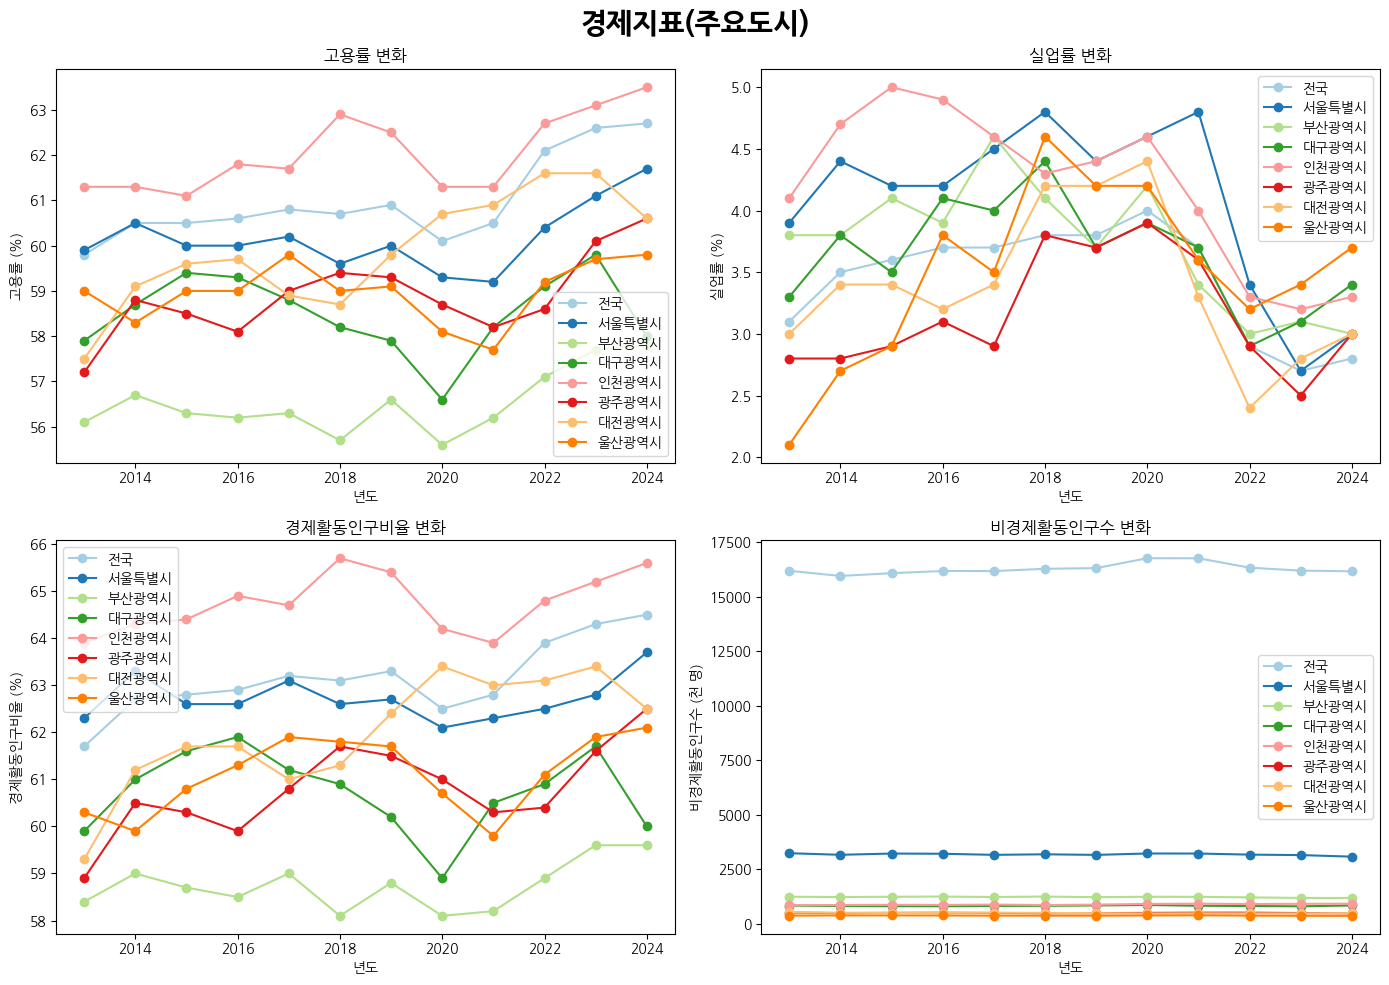

In [136]:
# 1. 각 경제지표 그래프
plt.figure(figsize=(14, 10))

df_list = [df_employment_rate, df_unemployment_rate, df_active_population, df_inactive_population]
titles = ["고용률 변화", "실업률 변화", "경제활동인구비율 변화", "비경제활동인구수 변화"]
y_labels = ["고용률 (%)", "실업률 (%)", "경제활동인구비율 (%)", "비경제활동인구수 (천 명)"]

for i, df in enumerate(df_list):
    plt.subplot(2, 2, i+1)
    for j, col in enumerate(df.columns[1:]):  # 컬럼 루프는 한 번만 사용 -> 안그럼 무한루프됨....
        plt.plot(df["year"], df[col], marker="o", label=col, color=color1[j % len(color1)])  
    plt.title(titles[i])
    plt.xlabel("년도")
    plt.ylabel(y_labels[i])
    plt.legend()

plt.suptitle("경제지표(주요도시)", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()


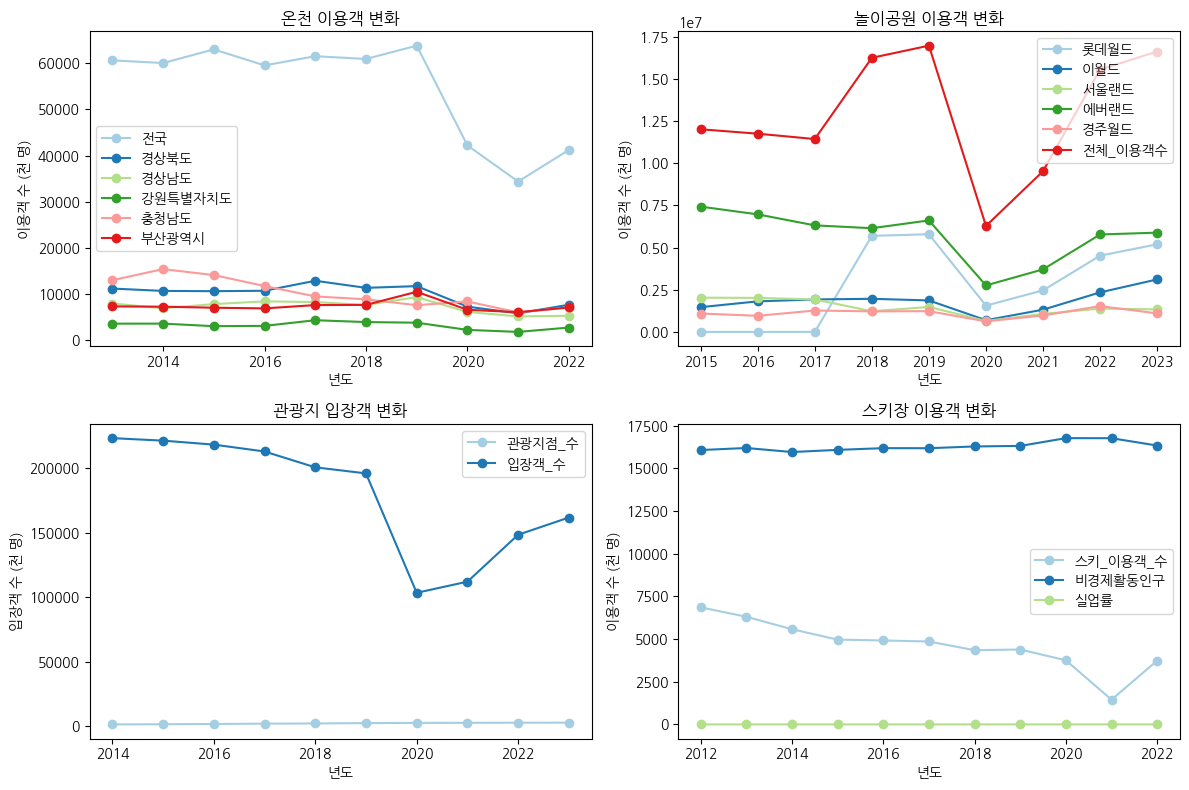

In [87]:
# 2. 여가 활동 지표 그래프
plt.figure(figsize=(12, 8))

df_list = [df_hotspring, df_park, df_tour, df_ski_economy]
titles = ["온천 이용객 변화", "놀이공원 이용객 변화", "관광지 입장객 변화", "스키장 이용객 변화"]
y_labels = ["이용객 수 (천 명)", "이용객 수 (천 명)", "입장객 수 (천 명)", "이용객 수 (천 명)"]

for i, df in enumerate(df_list):
    plt.subplot(2, 2, i+1)
    for j, col in enumerate(df.columns[1:]):  # 컬럼 루프는 한 번만 사용 -> 안그럼 무한루프됨....
        plt.plot(df["year"], df[col], marker="o", label=col, color=color1[j % len(color1)])  
    plt.title(titles[i])
    plt.xlabel("년도")
    plt.ylabel(y_labels[i])
    plt.legend()

plt.tight_layout()
plt.show()


In [47]:
print(df_income_impact.dtypes)


소득별             object
Not at all     float64
slightly       float64
somewhat       float64
moderately     float64
Quite a lot    float64
A lot          float64
extremely      float64
dtype: object


In [62]:
# "소득별" 컬럼을 인덱스로 설정 (소계 포함)
df_income_impact.set_index("소득별", inplace=True)


KeyError: "None of ['소득별'] are in the columns"

In [63]:
df_income_impact

,Not at all,slightly,somewhat,moderately,Quite a lot,A lot,extremely
소득별,,,,,,,
소계,0.8,3.2,6.6,16.9,27.8,28.3,16.3
100만원 미만,1.3,1.4,3.9,17.1,22.9,30.8,22.5
100-200만원 미만,1.0,3.4,7.1,13.8,25.1,30.8,18.9
200-300만원 미만,0.9,2.8,5.1,16.5,28.6,28.6,17.6
300-400만원 미만,0.7,2.5,6.6,18.0,27.9,28.5,15.8
400-500만원 미만,0.7,2.5,5.9,17.9,26.8,30.7,15.5
500-600만원,0.2,2.7,6.6,17.4,30.9,27.3,15.0
600만원 이상,1.2,4.8,7.9,16.0,27.5,26.5,16.0


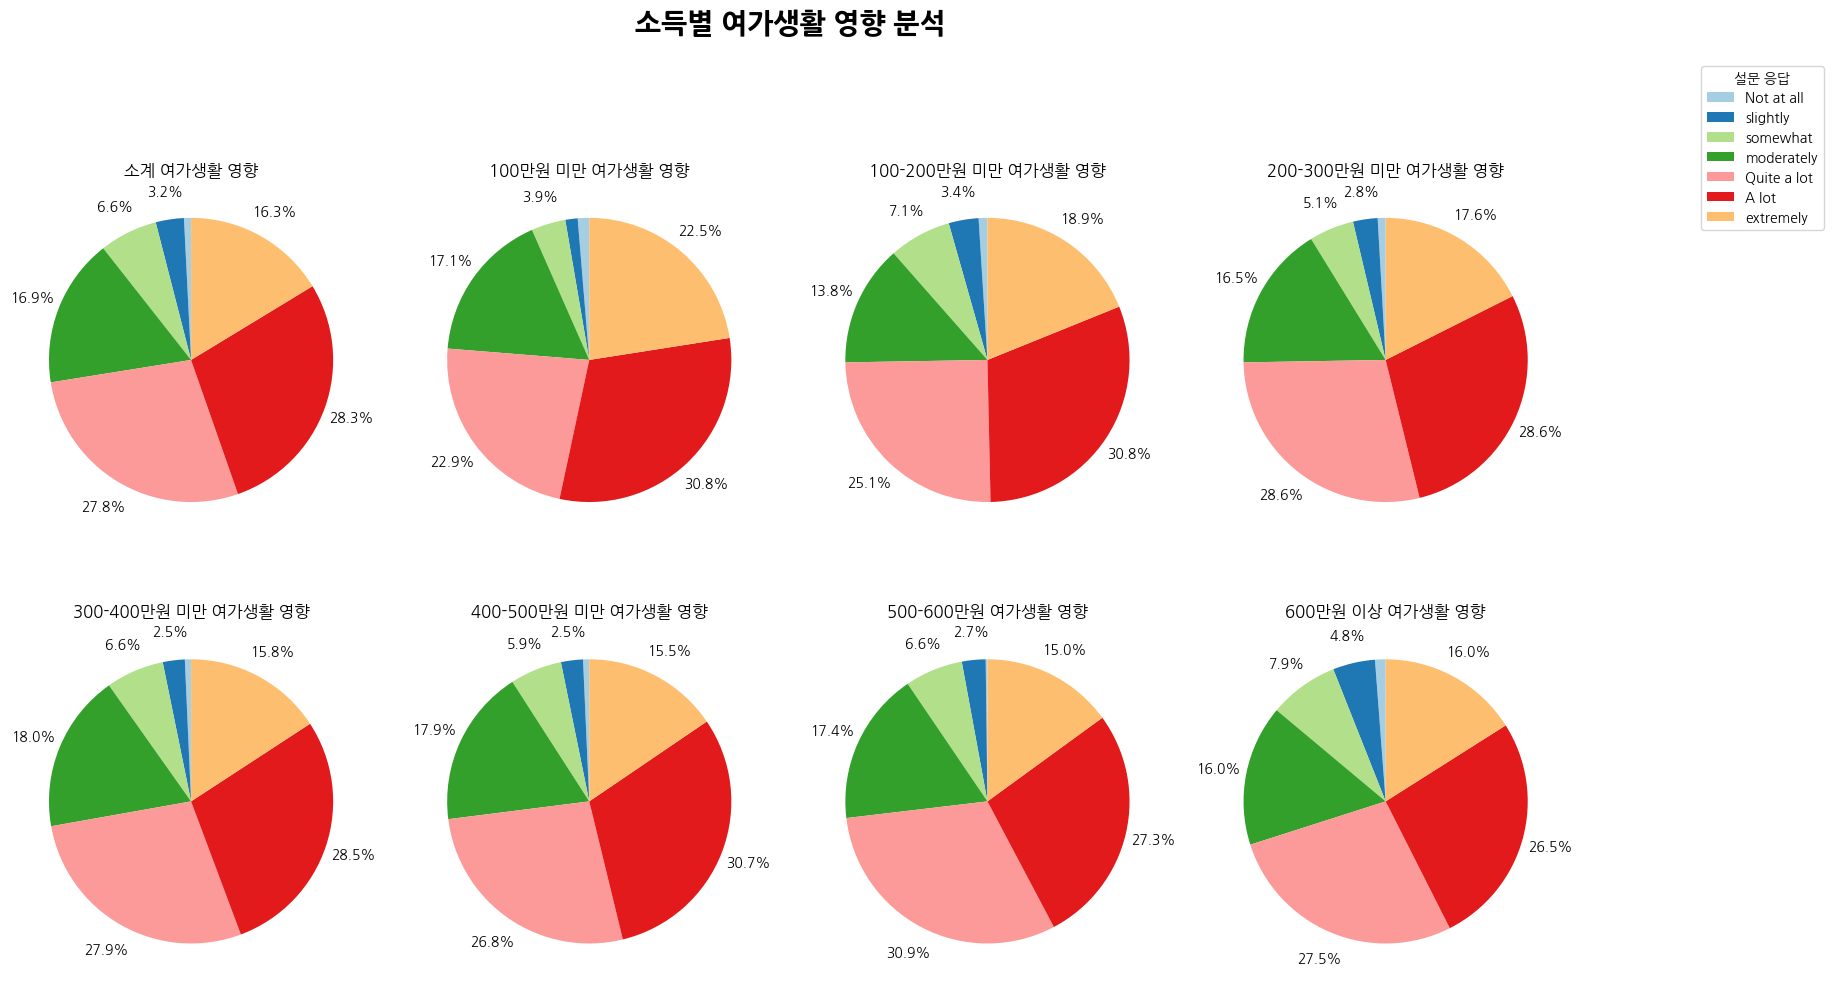

In [60]:
# 소득 분위 리스트 (소계 포함)
income_brackets = df_income_impact.index  
num_brackets = len(income_brackets)

# 한 줄에 4개씩 배치 (자동 계산)
num_cols = 4
num_rows = (num_brackets + num_cols - 1) // num_cols  # 올림처리하여 행 개수 계산

# 소득 분위별 Pie 차트 그리기 (Legend 포함)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))

axes = axes.flatten()  # 1D 배열로 변환하여 쉽게 인덱싱
legend_labels = df_income_impact.columns  # 응답 카테고리 리스트

for i, income in enumerate(income_brackets):
    wedges, texts, autotexts = axes[i].pie(
        df_income_impact.loc[income],
        autopct=lambda p: f'{p:.1f}%' if p > 2 else '',  # 2% 이하 값 생략
        startangle=90,
        pctdistance=1.2,  # 퍼센트 값을 원 바깥쪽에 배치
        colors=plt.cm.Paired.colors  # 다양한 색상 적용
    )

    # 제목 설정
    axes[i].set_title(f"{income} 여가생활 영향")
    axes[i].set_ylabel("")

# 전체 차트에 대한 범례(legend) 추가
fig.legend(legend_labels, title="설문 응답", loc="upper right", bbox_to_anchor=(1.15, 1))

# 빈 서브플롯 숨기기 (데이터 개수가 4의 배수가 아닐 경우)
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.suptitle("소득별 여가생활 영향 분석", fontsize=20, fontweight="bold", y=1.05)
plt.tight_layout()
plt.show()




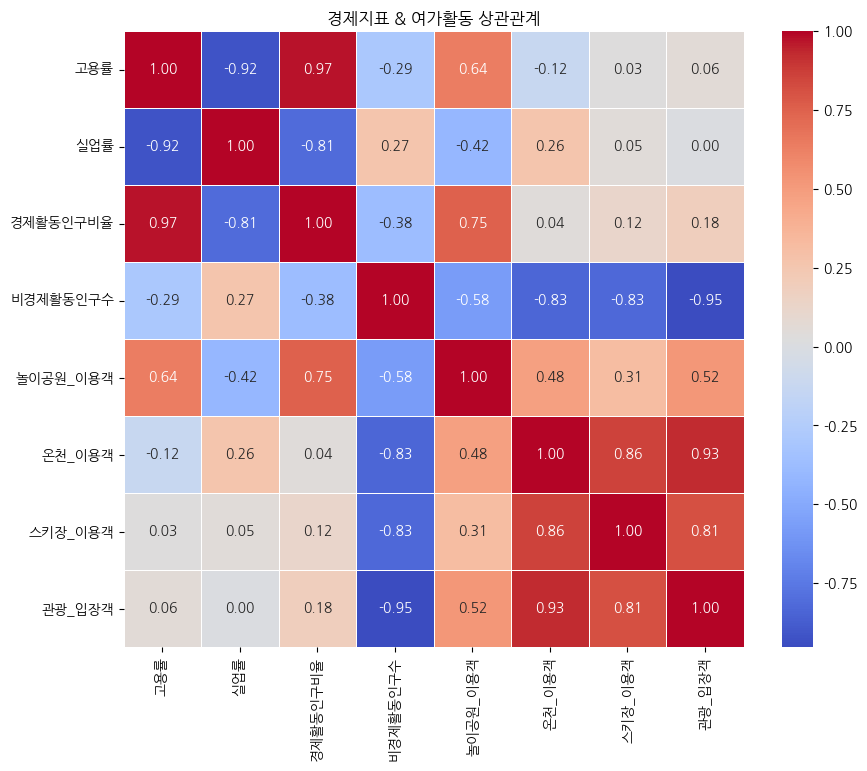

In [ ]:
# 3-2. 경제-여가 활동 상관관계 히트맵
plt.figure(figsize=(10, 8))
correlation_matrix = df_correlation.drop(columns=["year"]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("경제지표 & 여가활동 상관관계")
plt.show()


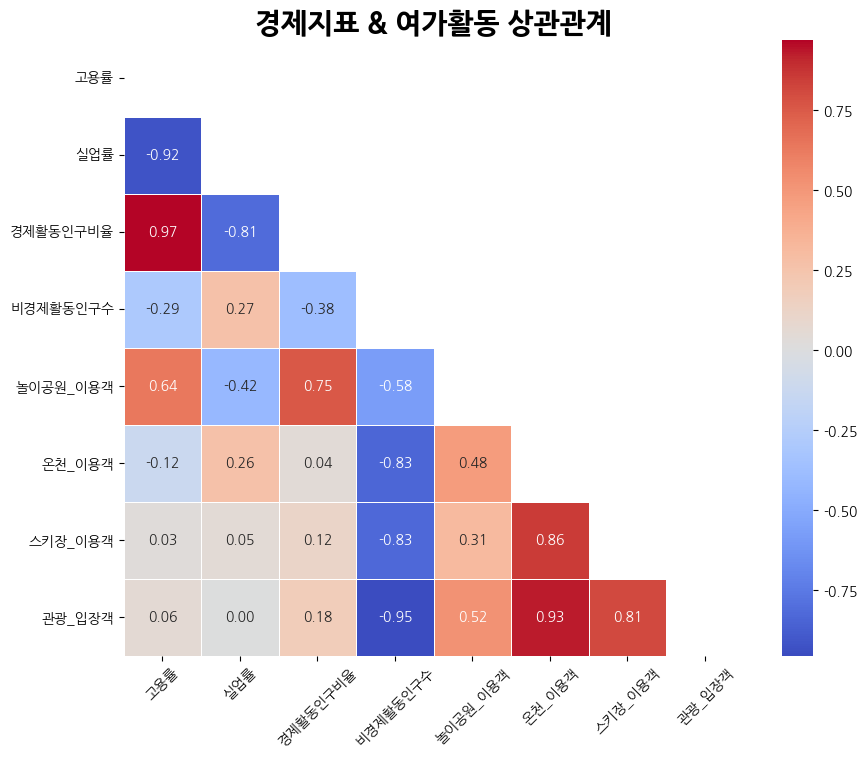

In [ ]:
import numpy as np

plt.figure(figsize=(10, 8))

# 상관행렬 계산 (year 컬럼 제외)
correlation_matrix = df_correlation.drop(columns=["year"]).corr()

# 상삼각행렬을 제거하기 위한 마스크 생성
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기 (위쪽 삼각형 제거)
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    mask=mask  # 마스킹 적용
)

# X축, Y축 라벨 회전 (X축 45도 회전)
plt.xticks(rotation=45)
plt.yticks(rotation=0)  # Y축은 그대로 유지

plt.title("경제지표 & 여가활동 상관관계",fontsize=20, fontweight="bold")
plt.show()


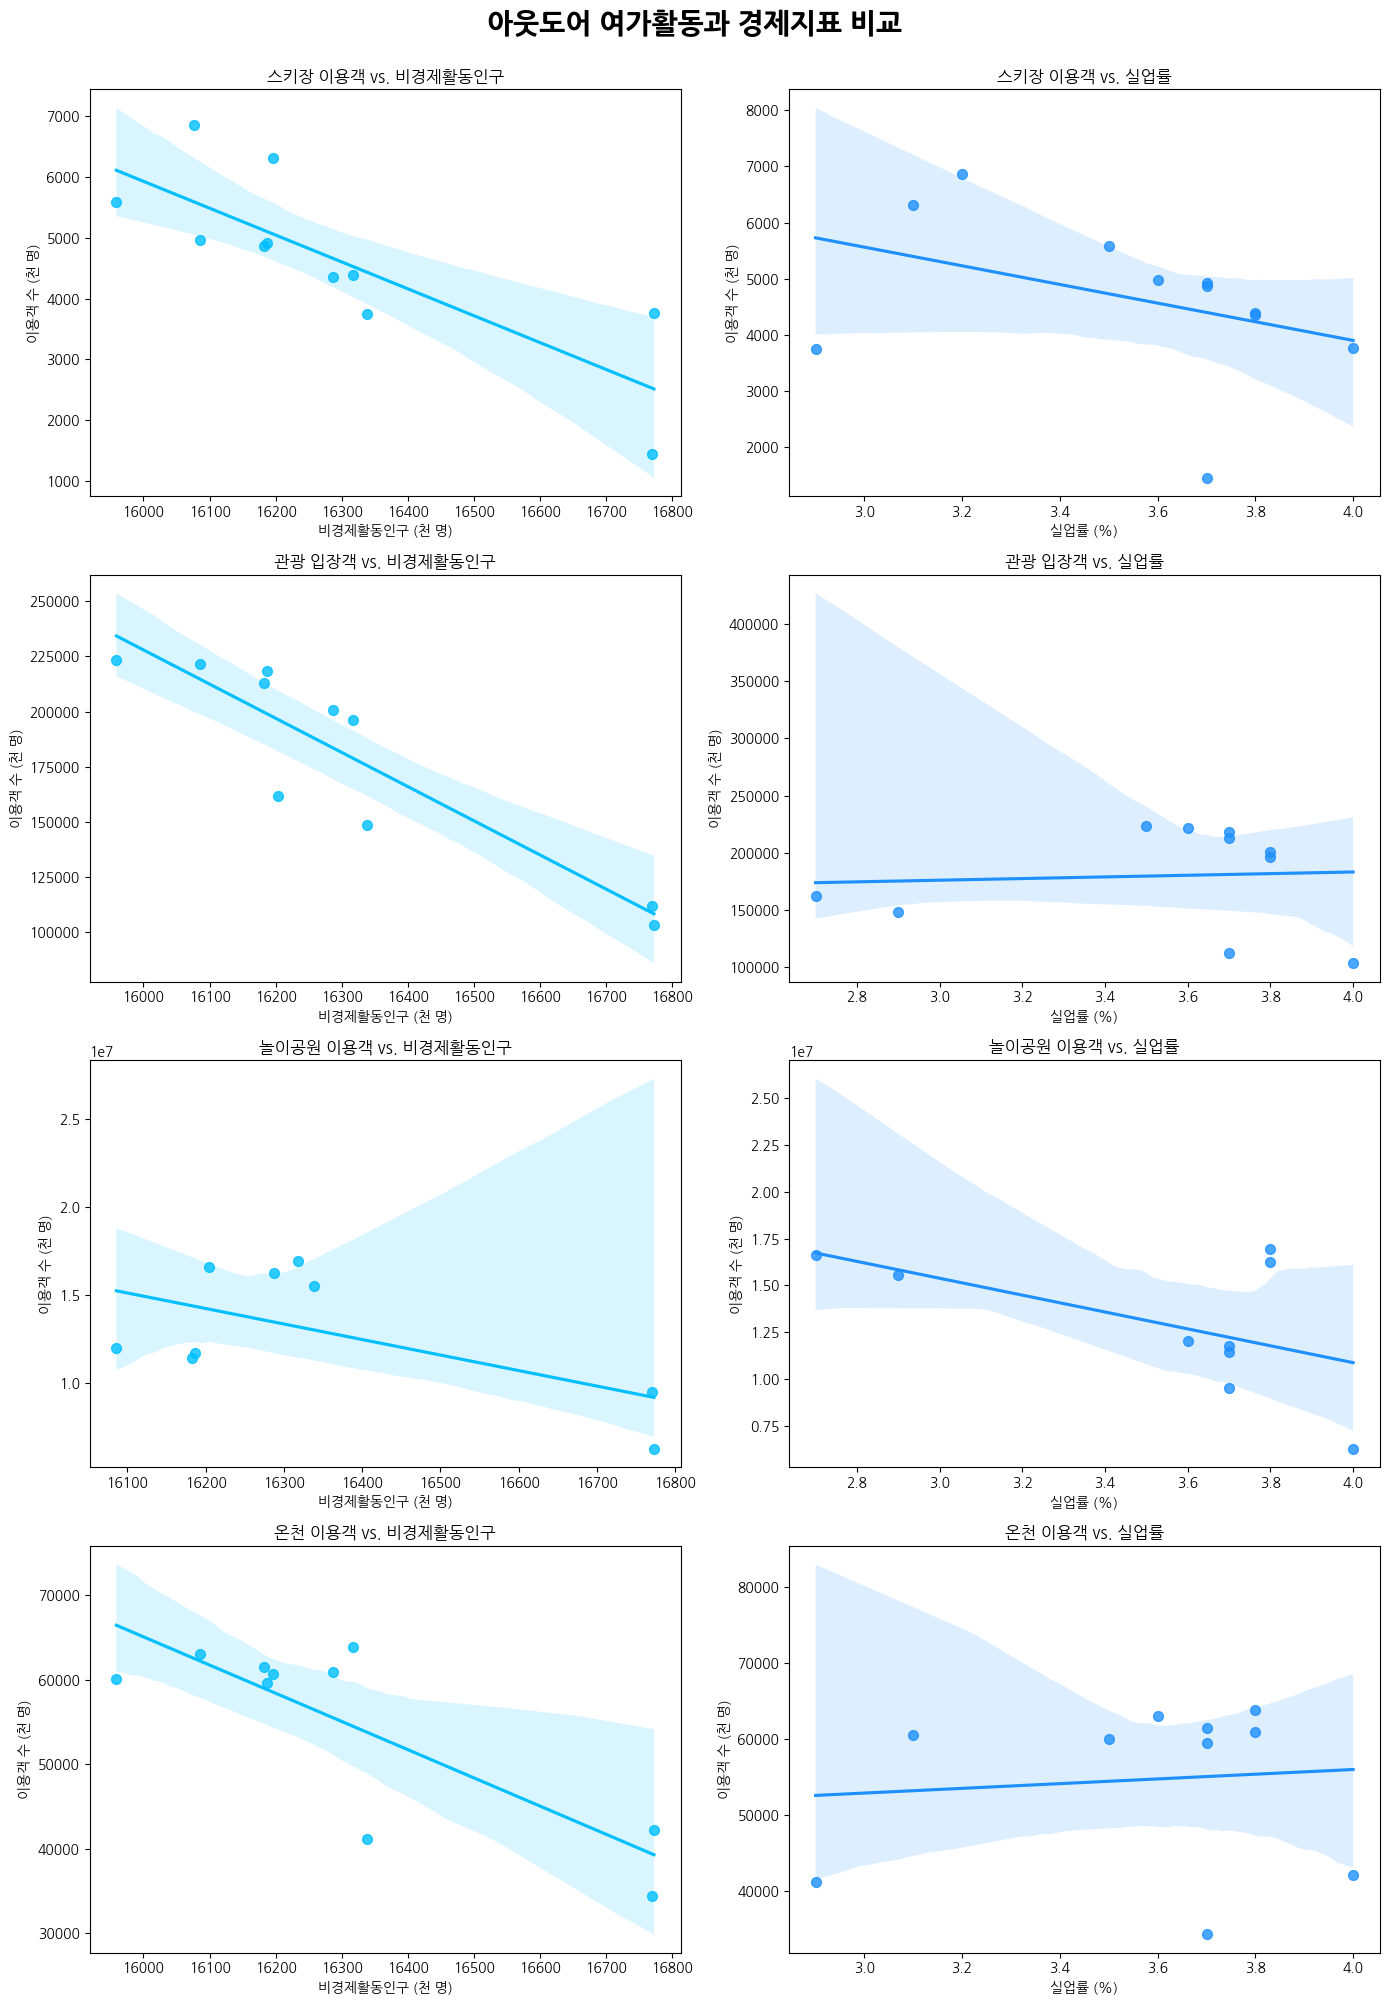

In [ ]:
# 3. 비경제활동인구 & 실업률 vs. 여가활동 subplot (8개 그래프)
fig, axes = plt.subplots(4, 2, figsize=(14, 20))

df_list = [df_ski_economy, df_tour_economy, df_park_economy, df_hotspring_economy]
titles = ["스키장 이용객", "관광 입장객", "놀이공원 이용객", "온천 이용객"]
y_labels = ["이용객 수 (천 명)", "이용객 수 (천 명)", "이용객 수 (천 명)", "이용객 수 (천 명)"]

for i, df in enumerate(df_list):
    # (1) 비경제활동인구 vs 활동지표
    ax1 = axes[i, 0]
    sns.regplot(x=df["비경제활동인구"], y=df.iloc[:, 1], ax=ax1, scatter_kws={"s": 50}, color="deepskyblue")
    ax1.set_title(f"{titles[i]} vs. 비경제활동인구")
    ax1.set_xlabel("비경제활동인구 (천 명)")
    ax1.set_ylabel(y_labels[i])

    # (2) 실업률 vs 활동지표
    ax2 = axes[i, 1]
    sns.regplot(x=df["실업률"], y=df.iloc[:, 1], ax=ax2, scatter_kws={"s": 50}, color="dodgerblue")
    ax2.set_title(f"{titles[i]} vs. 실업률")
    ax2.set_xlabel("실업률 (%)")
    ax2.set_ylabel(y_labels[i])

plt.suptitle("아웃도어 여가활동과 경제지표 비교",fontsize=20, fontweight="bold",y=1.)
plt.tight_layout()
plt.show()



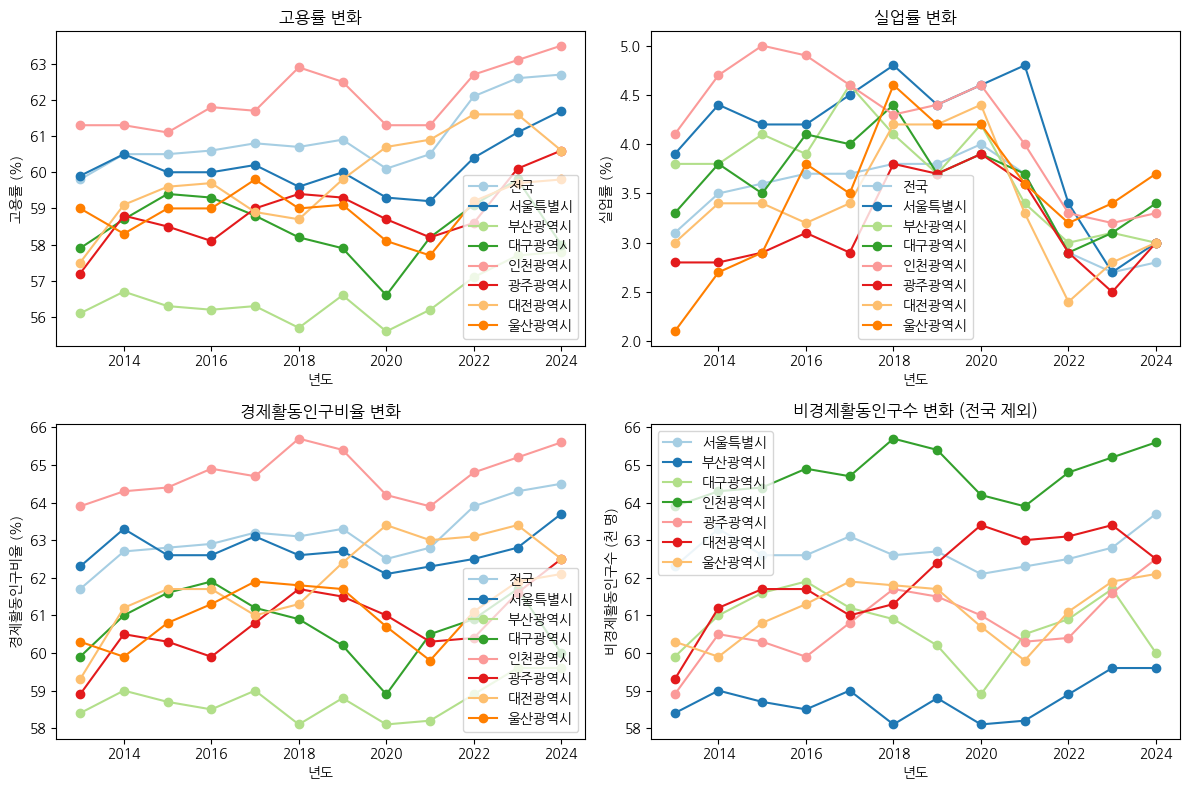

In [ ]:
# 1. 경제지표 그래프 (비경제활동인구수 전국 제외)
plt.figure(figsize=(12, 8))

df_list = [df_employment_rate, df_unemployment_rate, df_active_population]
titles = ["고용률 변화", "실업률 변화", "경제활동인구비율 변화"]
y_labels = ["고용률 (%)", "실업률 (%)", "경제활동인구비율 (%)"]

for i, df in enumerate(df_list):
    plt.subplot(2, 2, i+1)
    for j, col in enumerate(df.columns[1:]):  # 컬럼 루프는 한 번만 사용 -> 안그럼 무한루프됨....
        plt.plot(df["year"], df[col], marker="o", label=col, color=color1[j % len(color1)])  
    plt.title(titles[i])
    plt.xlabel("년도")
    plt.ylabel(y_labels[i])
    plt.legend()


# 비경제활동인구수 (전국 제외)
plt.subplot(2, 2, 4)
df_no_national = df_inactive_population.drop(columns=["전국"])  # 전국 제외    
for j, col in enumerate(df_no_national.columns[1:]): 
        plt.plot(df["year"], df[col], marker="o", label=col, color=color1[j % len(color1)])
plt.title("비경제활동인구수 변화 (전국 제외)")
plt.xlabel("년도")
plt.ylabel("비경제활동인구수 (천 명)")
plt.legend()

plt.tight_layout()
plt.show()


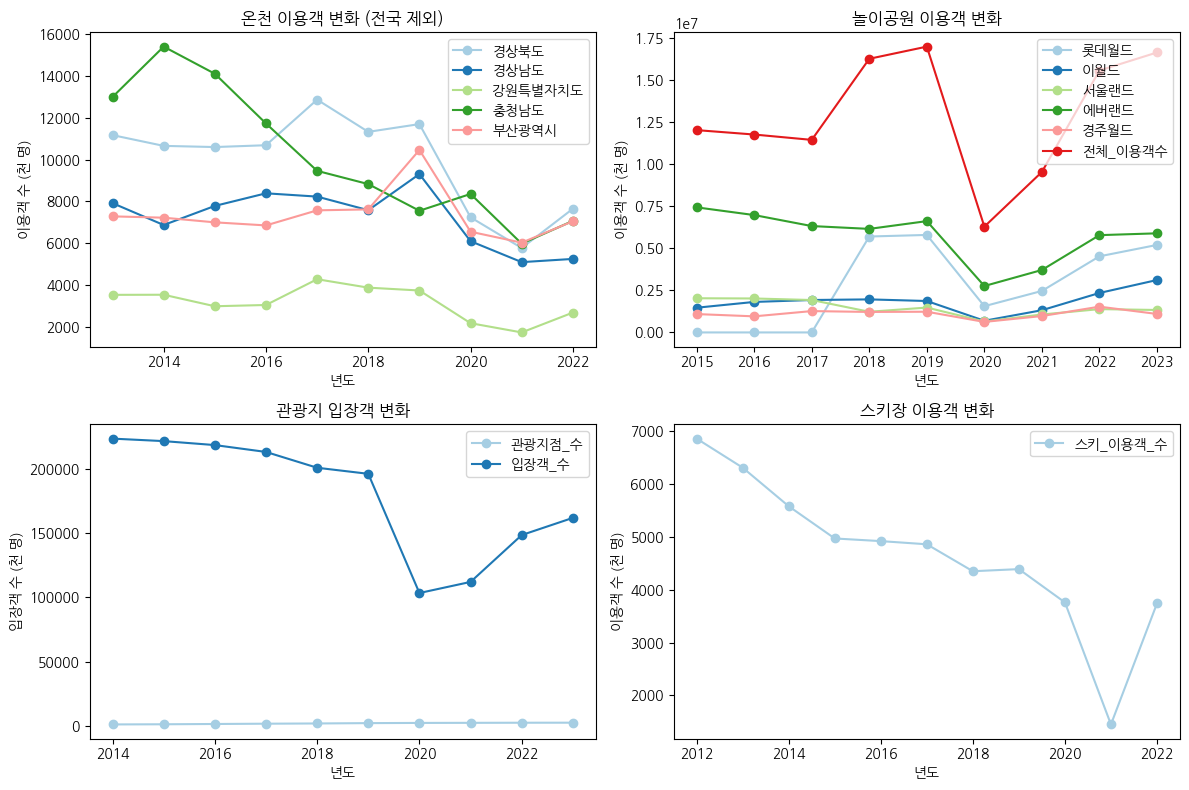

In [93]:
# 2. 여가 활동 지표 그래프
plt.figure(figsize=(12, 8))

df_list = [df_hotspring.drop(columns=["전국"]), df_park, df_tour, df_ski_economy[["year", "스키_이용객_수"]]]
titles = ["온천 이용객 변화 (전국 제외)", "놀이공원 이용객 변화", "관광지 입장객 변화", "스키장 이용객 변화"]
y_labels = ["이용객 수 (천 명)", "이용객 수 (천 명)", "입장객 수 (천 명)", "이용객 수 (천 명)"]

for i, df in enumerate(df_list):
    plt.subplot(2, 2, i+1)
    for j, col in enumerate(df.columns[1:]):  # 컬럼 루프는 한 번만 사용 -> 안그럼 무한루프됨....
        plt.plot(df["year"], df[col], marker="o", label=col, color=color1[j % len(color1)])  
    plt.title(titles[i])
    plt.xlabel("년도")
    plt.ylabel(y_labels[i])
    plt.legend()

plt.tight_layout()
plt.show()


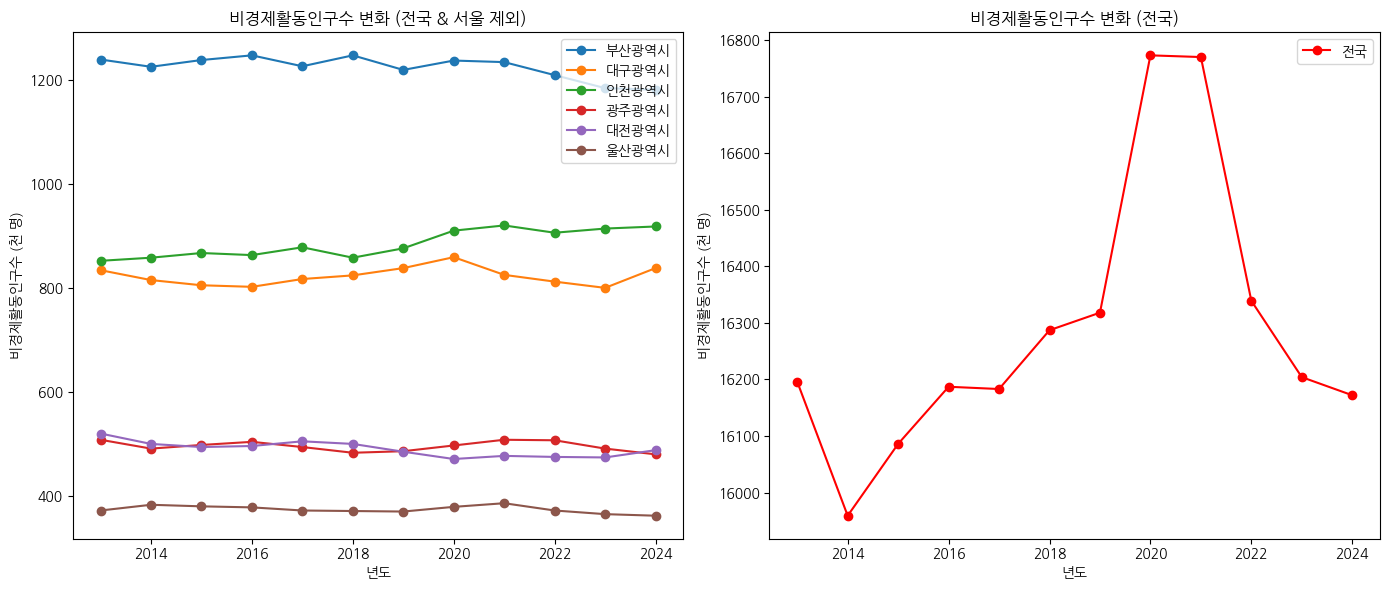

In [42]:
# 1. 비경제활동인구수 그래프 (전국 & 서울 제외 vs 전국 단독)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# (1) 전국 & 서울 제외
df_no_national_seoul = df_inactive_population.drop(columns=["전국", "서울특별시"])  # 전국 & 서울 제외
for col in df_no_national_seoul.columns[1:]:
    axes[0].plot(df_no_national_seoul["year"], df_no_national_seoul[col], marker="o", label=col)
axes[0].set_title("비경제활동인구수 변화 (전국 & 서울 제외)")
axes[0].set_xlabel("년도")
axes[0].set_ylabel("비경제활동인구수 (천 명)")
axes[0].legend()

# (2) 전국 단독 그래프
axes[1].plot(df_inactive_population["year"], df_inactive_population["전국"], marker="o", color="r", label="전국")
axes[1].set_title("비경제활동인구수 변화 (전국)")
axes[1].set_xlabel("년도")
axes[1].set_ylabel("비경제활동인구수 (천 명)")
axes[1].legend()

plt.tight_layout()
plt.show()


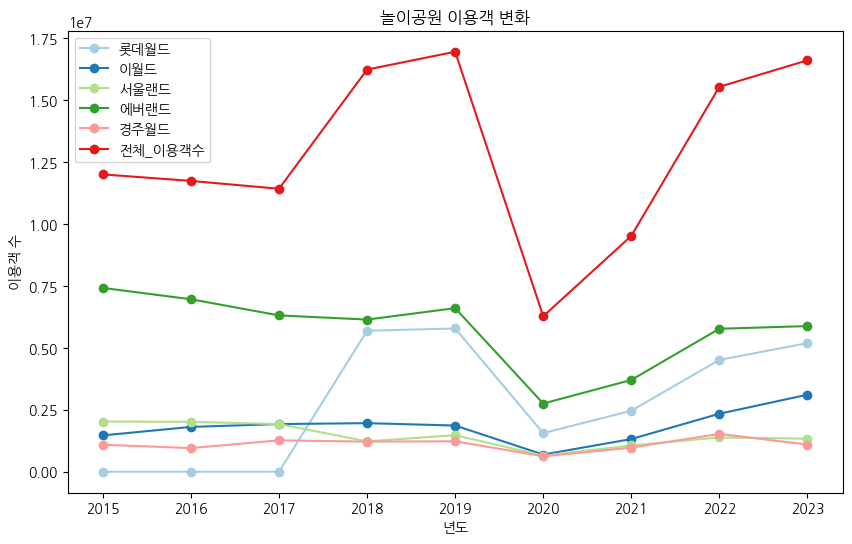

In [104]:
# 놀이공원 그래프
plt.figure(figsize=(10, 6))
for j, col in enumerate(df_park.columns[1:]):  # 'year' 제외
    plt.plot(df_park["year"], df_park[col], marker="o", label=col, color=color1[j % len(color1)])

plt.title("놀이공원 이용객 변화")
plt.xlabel("년도")
plt.ylabel("이용객 수")
plt.legend()
plt.show()

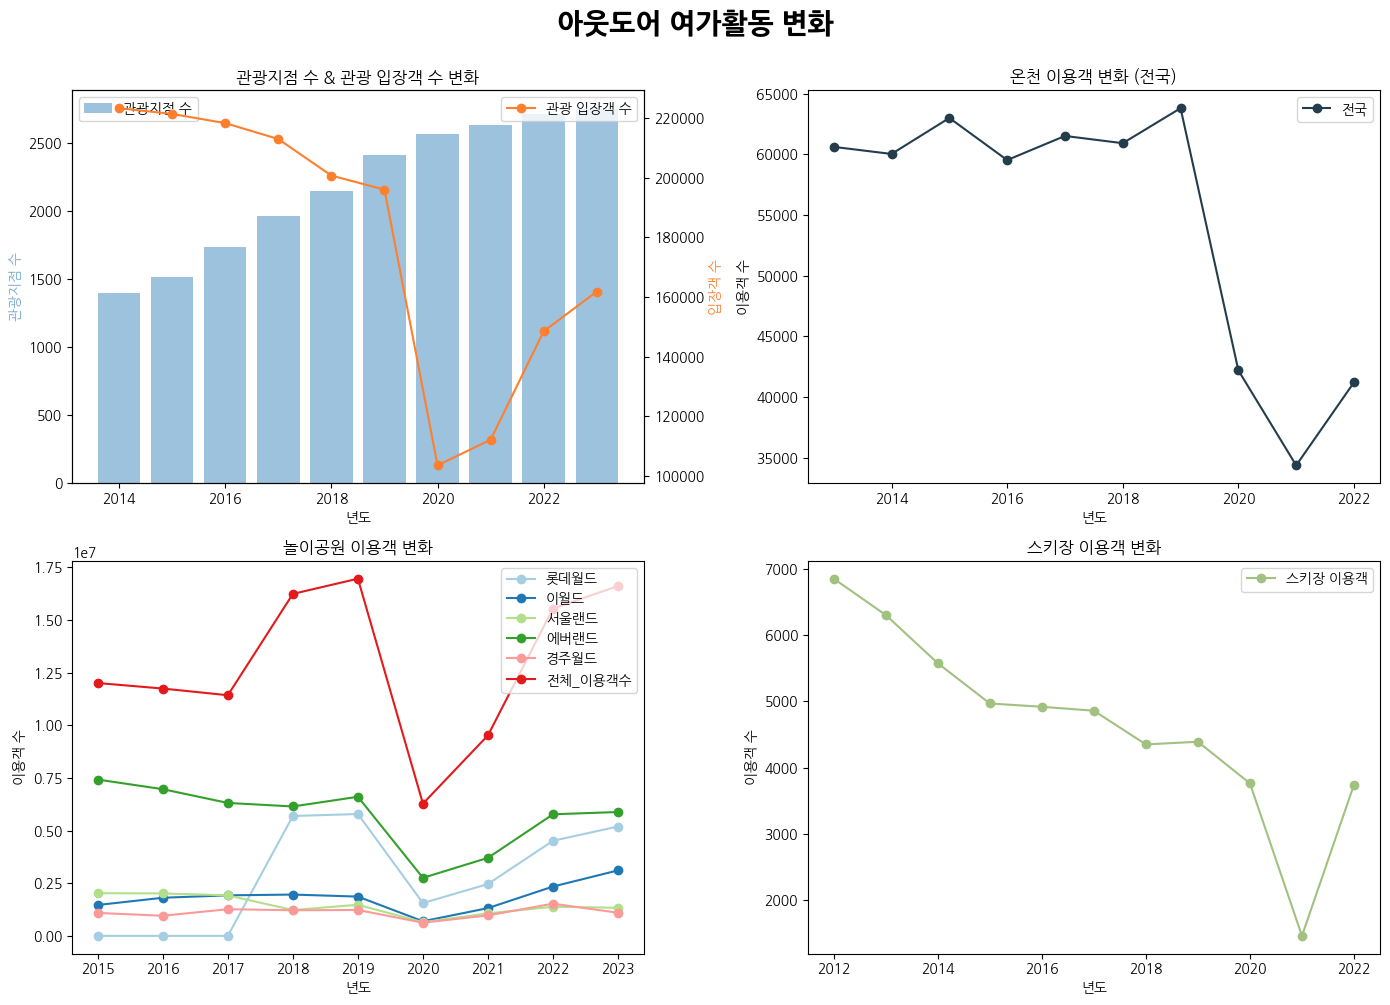

In [130]:
# 2번
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# (1) 관광지 입장객 수 & 관광지점 수 (막대 + 꺾은선 그래프)
ax1 = axes[0, 0]
ax2 = ax1.twinx()

ax1.bar(df_tour["year"], df_tour["관광지점_수"], color="#74a9cf", alpha=0.7, label="관광지점 수")
ax2.plot(df_tour["year"], df_tour["입장객_수"], marker="o", color=color2[1], label="관광 입장객 수")

ax1.set_xlabel("년도")
ax1.set_ylabel("관광지점 수", color="#74a9cf")
ax2.set_ylabel("입장객 수", color=color2[1])
ax1.set_title("관광지점 수 & 관광 입장객 수 변화")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# (2) 온천 이용객 (전국만)
axes[0, 1].plot(df_hotspring_economy["year"], df_hotspring_economy["전국_온천_이용객"], marker="o", color=color2[0], label="전국")
axes[0, 1].set_title("온천 이용객 변화 (전국)")
axes[0, 1].set_xlabel("년도")
axes[0, 1].set_ylabel("이용객 수")
axes[0, 1].legend()

# (3) 놀이공원 이용객 (개별 놀이공원 + 전체 이용객)
for j, col in enumerate(df_park.columns[1:]):  # 'year' 제외
    axes[1, 0].plot(df_park["year"], df_park[col], marker="o", label=col, color=color1[j % len(color1)])

axes[1, 0].set_title("놀이공원 이용객 변화")
axes[1, 0].set_xlabel("년도")
axes[1, 0].set_ylabel("이용객 수")
axes[1, 0].legend()

# (4) 스키장 이용객 (스키 이용객만)
axes[1, 1].plot(df_ski_economy["year"], df_ski_economy["스키_이용객_수"], marker="o", color=color2[3], label="스키장 이용객")
axes[1, 1].set_title("스키장 이용객 변화")
axes[1, 1].set_xlabel("년도")
axes[1, 1].set_ylabel("이용객 수")
axes[1, 1].legend()

plt.suptitle("아웃도어 여가활동 변화", fontsize=20, fontweight="bold",y=1.)
plt.tight_layout()
plt.show()


In [122]:
def get_economic_summary_data():
    query = """
    SELECT year, national_unemployment_rate as 실업률, national_employment_rate as 고용률,
        active_population as 경제활동인구비율, inactive_population as 비경제활동인구수
    FROM economic_summary
    WHERE year >= 2013
    """
    return fetch_data(query)
economic_summary = get_economic_summary_data()
economic_summary

,year,실업률,고용률,경제활동인구비율,비경제활동인구수
0,2013,3.1,59.8,62.0,16196.0
1,2014,3.5,60.5,63.0,15959.0
2,2015,3.6,60.5,63.0,16086.0
3,2016,3.7,60.6,63.0,16187.0
4,2017,3.7,60.8,63.0,16183.0
5,2018,3.8,60.7,63.0,16287.0
6,2019,3.8,60.9,63.0,16318.0
7,2020,4.0,60.1,62.0,16773.0
8,2021,3.7,60.5,63.0,16770.0
9,2022,2.9,62.1,64.0,16339.0


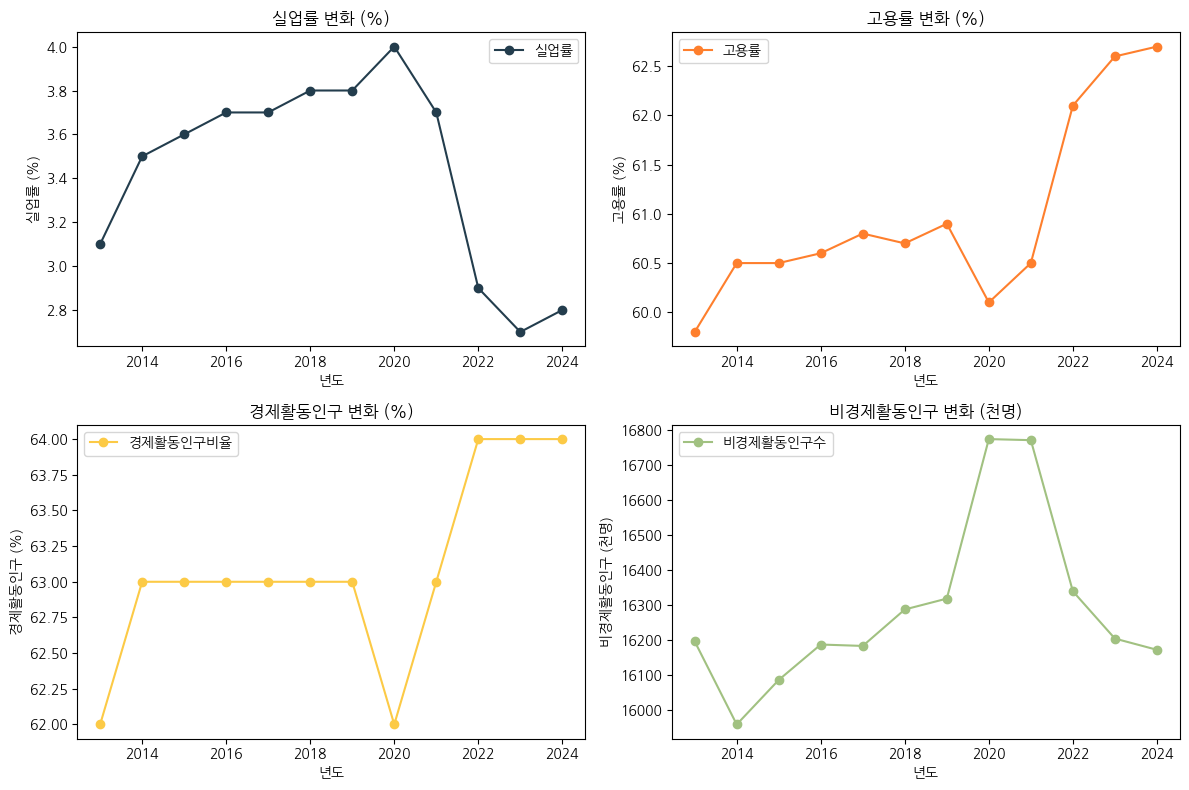

In [121]:
# 1. 경제지표 4가지 (전국만 비교)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

titles = ["실업률 변화 (%)", "고용률 변화 (%)", "경제활동인구 변화 (%)", "비경제활동인구 변화 (천명)"]
y_labels = ["실업률 (%)", "고용률 (%)", "경제활동인구 (%)", "비경제활동인구 (천명)"]
columns = ["실업률", "고용률", "경제활동인구비율", "비경제활동인구수"]

for i, ax in enumerate(axes.flatten()):
    ax = axes[i // 2, i % 2]
    ax.plot(economic_summary["year"], economic_summary[columns[i]], marker="o", color=color2[i], linestyle="-", label=columns[i])
    ax.set_title(titles[i])
    ax.set_xlabel("년도")
    ax.set_ylabel(y_labels[i])
    ax.legend()

plt.tight_layout()
plt.show()


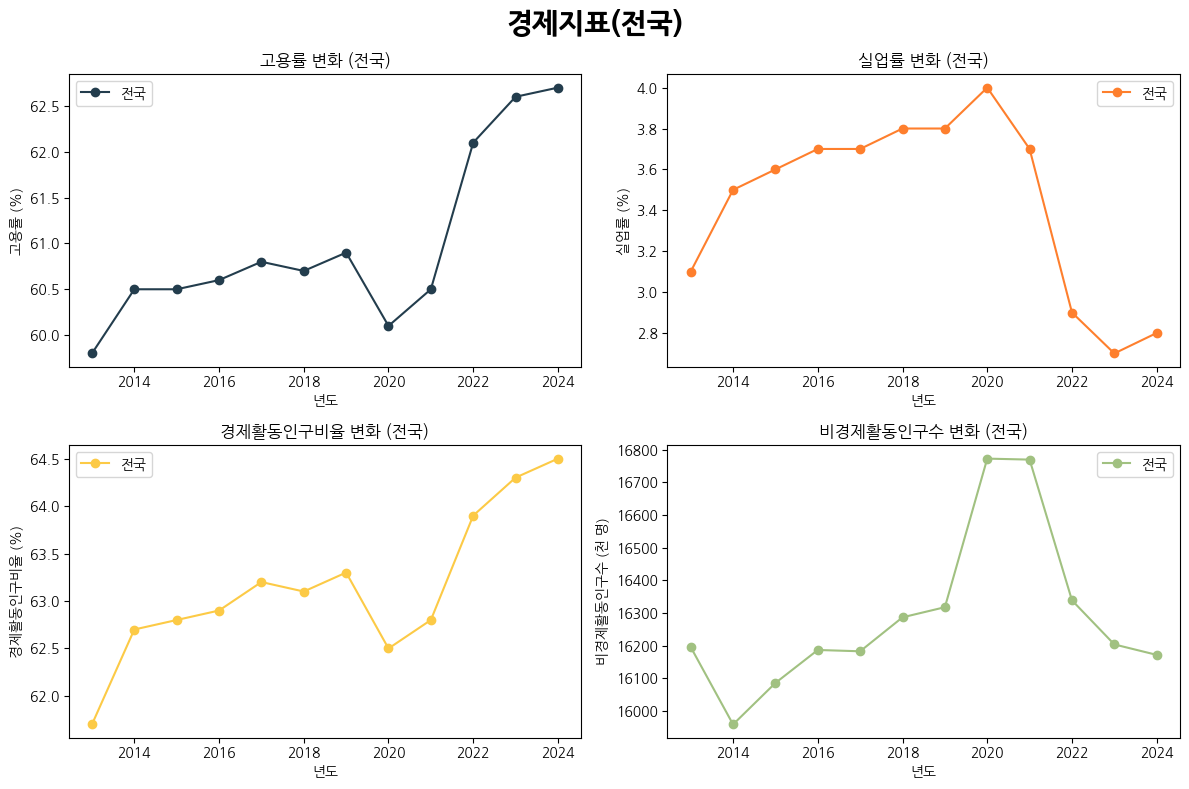

In [131]:
# 1번.
# 1. 경제지표 4가지 (전국만 비교)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

df_list = [df_employment_rate, df_unemployment_rate, df_active_population, df_inactive_population]
titles = ["고용률 변화 (전국)", "실업률 변화 (전국)", "경제활동인구비율 변화 (전국)", "비경제활동인구수 변화 (전국)"]
y_labels = ["고용률 (%)", "실업률 (%)", "경제활동인구비율 (%)", "비경제활동인구수 (천 명)"]

for i, df in enumerate(df_list):
    ax = axes[i // 2, i % 2]
    ax.plot(df["year"], df["전국"], marker="o", color=color2[i], label="전국")
    ax.set_title(titles[i])
    ax.set_xlabel("년도")
    ax.set_ylabel(y_labels[i])
    ax.legend()

plt.suptitle("경제지표(전국)", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()


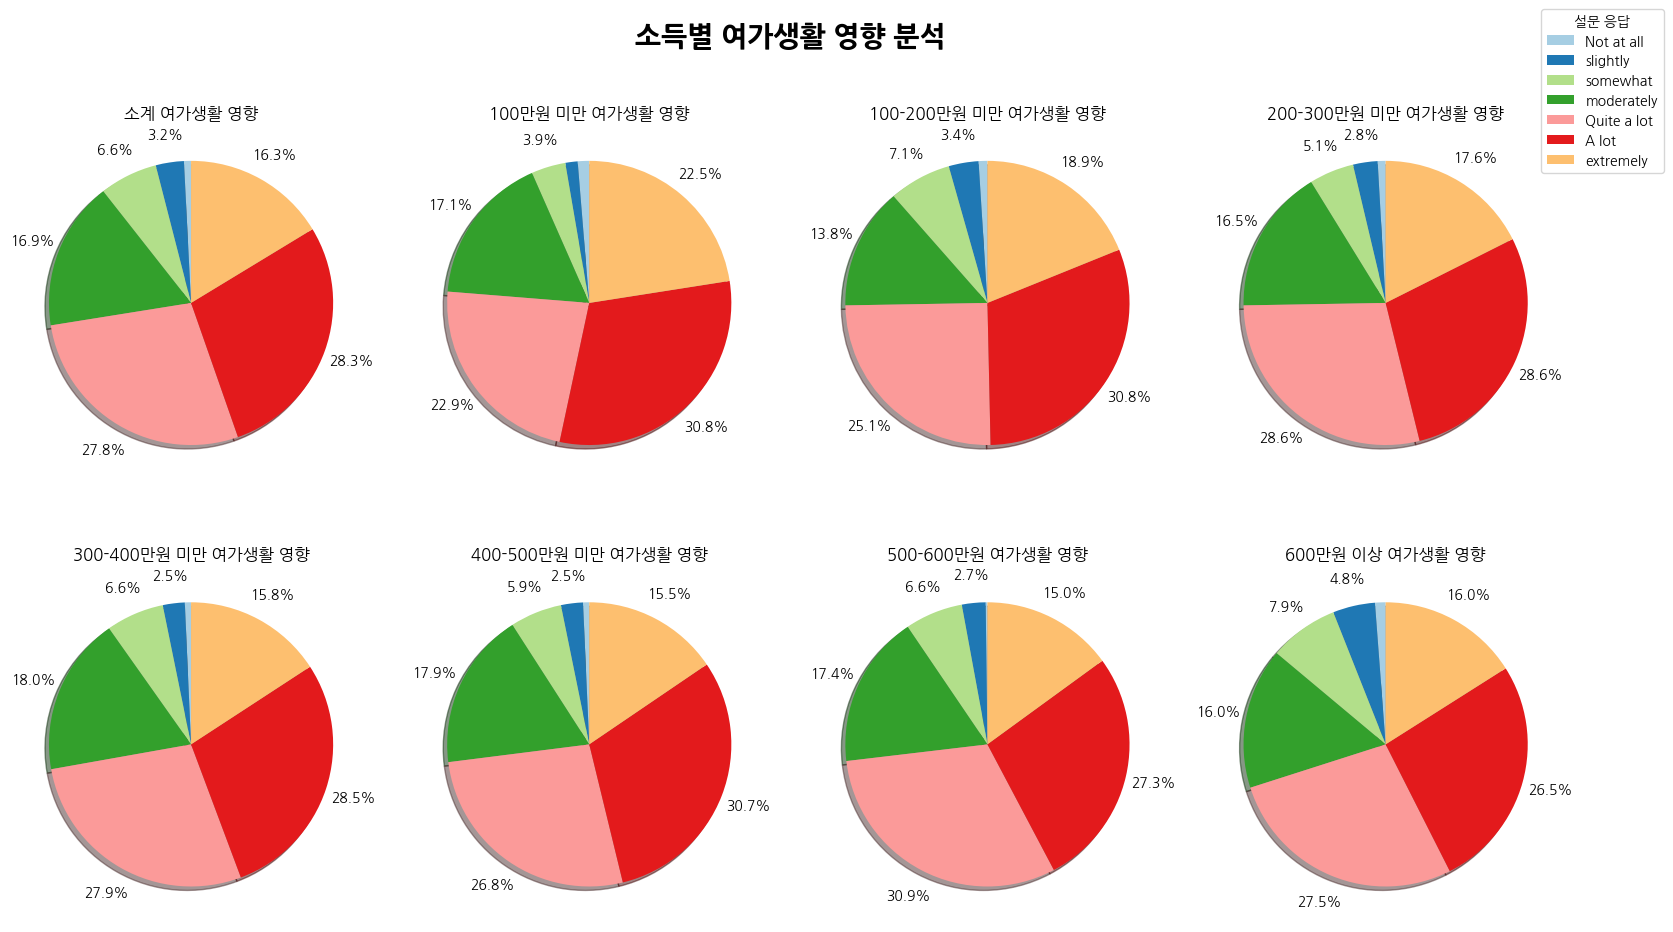

In [132]:
# # [1] 인덱스 설정 오류 수정
# df_income_impact.set_index("소득별", inplace=True)

# [2]소득 분위 리스트 가져오기
income_brackets = df_income_impact.index.tolist()

# [3] Pie 차트 그리기
fig, axes = plt.subplots(2, 4, figsize=(16, 10))  # 한 줄에 4개씩 배치

axes = axes.flatten()
legend_labels = df_income_impact.columns  # 응답 카테고리 리스트

for i, income in enumerate(income_brackets):
    wedges, texts, autotexts = axes[i].pie(
        df_income_impact.loc[income],
        autopct=lambda p: f'{p:.1f}%' if p > 2 else '',  # 2% 이하 값 생략
        startangle=90,
        pctdistance=1.2,
        colors=color1,
        shadow=True
    )

    axes[i].set_title(f"{income} 여가생활 영향")
    axes[i].set_ylabel("")

fig.legend(legend_labels, title="설문 응답", loc="upper right", bbox_to_anchor=(1.05, 1))

plt.suptitle("소득별 여가생활 영향 분석", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()
